## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (MLP). Multilayer perceptrons can be called the 'basic' variety of neural networks. They have an input layer, a number of hidden layers, and an output layer. First, let's create our input.

This code below generates two input values (x) and an output value (y) according to different patterns that are not linear.
It also adds a bias term (a vector of 1s) to the input. Adding a bias term to the input like this and initialising it to 1 is a trick that often improves performance. This bias term is not directly updated, but the weight matrix will include a row that, when multiplied with our x_mat_full, does with the bias term what the algorithm deems right for the task.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
## create input

num_obs = 500
x = np.random.uniform(-1,1,size = (num_obs,2))
bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x,bias), axis=1)

We will see how this architecture can model non-linear patterns in data. We will experiment with different non-linear patterns and see how quickly or slowly the weights converge. We start of by picking just one kind of non-linear categorisation.

shape of x_mat_full is (500, 3)
shape of y is (500,)


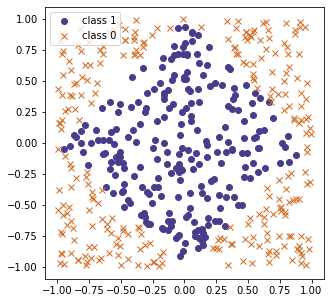

In [3]:
# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))


fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
ax.legend(loc='best')

The code below gives you the building blocks of the MLP up to the backward pass, which you will write yourself.

In [4]:
def multiplier(arr1, arr2):
    '''this function plays the role of np.dot() multiplication'''
    
    #get the lenght of array 1
    count = len(arr1)
    # create a array of size lenght of array 1
    product = np.zeros([count])
    
    #loop through the size of the array or for each row in our arrays
    for i in range(count):
        
        #we get the product row wise
        product[i] = np.dot(arr1[i], arr2[i])
    return product.reshape(count,1) #and reshape it to 2D array of size (count,1)


def multiplier2(arr1, arr2):
    '''this function and add the '''
    
    #get the lenght of array 1
    count = len(arr1)
    # create a array of size lenght of array 1
    product = np.zeros([count])
    
    #loop through the size of the array or for each row in our arrays
    for i in range(count):
        
        # this time around we get the  product of array 1 row (i) i being the iterator which will change the index as 
        # and arra2 row wise of column 0 + row in array2 column 1
        product[i] = (arr1[i] * arr2[i,0]) + arr2[i,1]
        
    return product.reshape(count,1)


In [5]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    
    #feed forward NN 
    #build our first layer by computing the input and the weight 
    z_2 = multiplier(x_mat, W1)
    
    #pass the product through our activation function ()
    a_2 = sigmoid(z_2) #this is our first hidden layer 
    
    # we use the output of our first hidden layer to build a second hidden layer 
    # so second hidden layer is the product of our first hidden layer and w2 
    z_3 = multiplier2(a_2, W2)
    
    #now we pass the ouptput of the second hidden layer through an activaiton function and reshape it to a 1D array
    # will be the output layer and final layer of our NN
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    
    
    # # backpropagation
    
    # Now compute the gradient
    
    #we start by computing the error or the difference between our final output and the expected result
    J_z_3_grad = -y + y_pred
    
    #simply put the final output of the FNN is a guess it doesn't have to be true but we gonna use that to learn the pattern 
    #for that we gonna use gradient decent to minimize the error and learn the pattern
    
    
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time

First, initialise the parameters. This means determining the following:

#### Size of the network

Hidden layers (or a single hidden layer in this example) can be any size. Layers with more neurons are more powerful, but also more likely to overfit, and take longer to train.
The output layer size corresponds to the number of classes.

#### Number of iterations

This parameter determines how many times the network will be updated. 

#### Learning rate

Each time we update the weights, we do so by taking a step into the direction that we calculated will improve the accuracy of the network. The size of that step is determined by the learning rate. Taking small steps will slow the process down, but taking steps that are too large can cause results to vary wildly and not reach a stable optimum. 

Next, fill in the code below to train a multi-layer perceptron and see if it correctly classies the input.

In [6]:
#### Initialize the network parameters

np.random.seed(1241)

#create a array with random number between -1 and 1, our array will the same dimension and same number of rows
random_weights = np.random.uniform(-1,1,size = (num_obs,2)) # To Get random Weights for W_1


bias_factor = np.ones((num_obs,1)) # A placeholder for bias in dot function
#using the array with random number and the above with ones(bias) we put them together and that makes up our first weight
W_1 = np.concatenate( (random_weights,bias_factor), axis=1)

random_weights = np.random.uniform(-1,1,size = (num_obs,1)) # To get random weights for W_2
bias_factor = np.ones((num_obs,1)) # A placeholder for Bias in dot function
#using the array with random number and the above with ones(bias) we put them together and that makes up our second weight
W_2 = np.concatenate( (random_weights,bias_factor), axis=1)

num_iter = 3000
learning_rate = 0.0009
x_mat = x_mat_full

In [10]:
# Creating empty lists for loss values(error) and accuracy
loss_vals, accuracies = [], []

for j in range(num_iter):
    # Do a forward pass through the dataset and compute the loss
    y_pred, gradient = forward_pass(W_1, W_2)
    # Decide on intervals and add on the current loss and accuracy to the respective list
    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    # Calculate the accuracy between y and y_pred
    bool_arr = y == y_pred
    correct = np.sum(bool_arr)
    accuracy = correct / num_obs
    # Add the values to the lists
    loss_vals.append(loss)
    accuracies.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
    if j % 200 == 0:
        print(f"{j}th interation")
        print('Loss ======================= ', round(loss), '\n\nAccuracy =================== ', round(accuracy*100),'\n\n')
    
    # Update the weights
    for weight in range(num_obs):
        W_1[weight, 0] += (gradient[0][0][weight] * learning_rate)
        W_1[weight, 1] += (gradient[0][1][weight] * learning_rate)
        W_2[weight, 0] += (gradient[0][2][weight] * learning_rate)


0th interation
Loss =======================  1 

Accuracy ===================  0 


200th interation
Loss =======================  9 

Accuracy ===================  9 




C:\Users\Nando\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


400th interation
Loss =======================  13 

Accuracy ===================  24 


600th interation
Loss =======================  14 

Accuracy ===================  22 


800th interation
Loss =======================  16 

Accuracy ===================  23 


1000th interation
Loss =======================  17 

Accuracy ===================  22 


1200th interation
Loss =======================  18 

Accuracy ===================  36 


1400th interation
Loss =======================  18 

Accuracy ===================  44 


1600th interation
Loss =======================  18 

Accuracy ===================  45 


1800th interation
Loss =======================  18 

Accuracy ===================  45 


2000th interation
Loss =======================  18 

Accuracy ===================  45 


2200th interation
Loss =======================  19 

Accuracy ===================  45 


2400th interation
Loss =======================  18 

Accuracy ===================  44 


2600th interation
Loss =

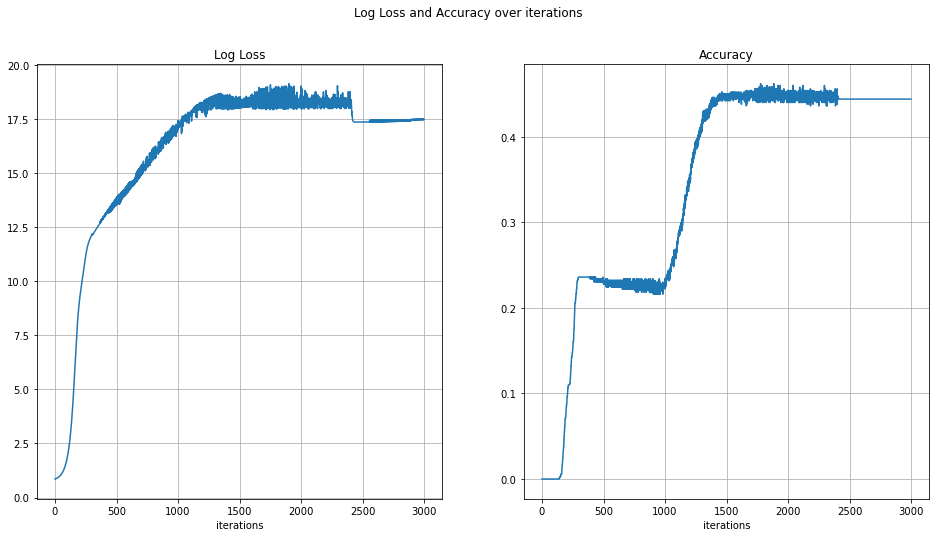

In [12]:
# Plot the loss values and accuracy
plot_loss_accuracy(loss_vals, accuracies)

The graph above shows that our model start dropping at about 2000th iteration.
Based on that we can decide to set number of iteration to 2000th to avoid overfitting.
alternatively we can adjust the learning rate for less iteration.

**Higher number of iterations and lower learning rate seems to improve accuracy**


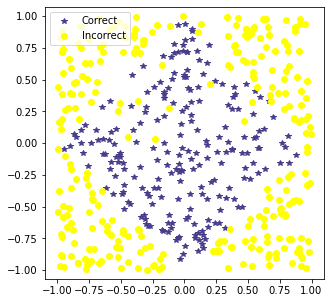

In [13]:
#### Plot the predicted answers with mistakes in yellow

#compare the predicted and expected values and get their boolean results
bool_arr = y == y_pred

#set the figure and and axes
fig, ax = plt.subplots(figsize=(5, 5))


#plot the true boolean from the above comparison in blue
ax.plot(x_mat_full[bool_arr == True, 0], x_mat_full[bool_arr == True, 1], '*', label='Correct', color='darkslateblue')

#and so we do the with the mistake in yellow

ax.plot(x_mat_full[bool_arr == False, 0], x_mat_full[bool_arr == False, 1], 'o', label='Incorrect', color='yellow')
ax.legend(loc='best')
ax.axis('equal');